# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [ ]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
#weather_response = requests.get(query_url).json()
#weather_response

In [ ]:

#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name_list = []
temperature_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
max_temp_list = []
lat_list = []
lng_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities: 
    try:
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url).json()
        print(f"Processing Record {cities.index(city) + 1} of Set 1 | {city}")
        lng = weather_response['coord']['lon']
        city_name_list.append(weather_response['name'])
        temperature_list.append(weather_response['main']['temp'])
        cloudiness_list.append(weather_response['clouds']['all'])
        wind_speed_list.append(weather_response['wind']['speed'])
        date_list.append(weather_response['dt'])
        country_list.append(weather_response['sys']['country'])
        max_temp_list.append(weather_response['main']['temp_max'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        humidity_list.append(weather_response['main']['humidity'])
    except KeyError:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")
   



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | marovoay
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | yerbogachen
Processing Record 7 of Set 1 | bure
Processing Record 8 of Set 1 | kavaratti
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | asau
City not found. Skipping...
Processing Record 11 of Set 1 | laguna
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | sainte-marie
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | mikkeli
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | makakilo city
Processing Record 22 of Set 1 | iraucuba
Processing Record 23 of Se

Processing Record 183 of Set 1 | upernavik
Processing Record 184 of Set 1 | axim
Processing Record 185 of Set 1 | bubaque
Processing Record 186 of Set 1 | jamestown
Processing Record 187 of Set 1 | fairbanks
Processing Record 188 of Set 1 | portland
Processing Record 189 of Set 1 | altay
Processing Record 190 of Set 1 | coquimbo
Processing Record 191 of Set 1 | saldanha
Processing Record 192 of Set 1 | tiksi
Processing Record 193 of Set 1 | santa maria
Processing Record 194 of Set 1 | turukhansk
Processing Record 195 of Set 1 | arraial do cabo
Processing Record 196 of Set 1 | tete
Processing Record 197 of Set 1 | muros
Processing Record 198 of Set 1 | aasiaat
Processing Record 199 of Set 1 | balabac
Processing Record 200 of Set 1 | kutum
Processing Record 201 of Set 1 | el ermitano
Processing Record 202 of Set 1 | casper
Processing Record 203 of Set 1 | rocha
Processing Record 204 of Set 1 | dingle
Processing Record 205 of Set 1 | reconquista
Processing Record 206 of Set 1 | roald
Proc

Processing Record 363 of Set 1 | rimbey
Processing Record 364 of Set 1 | fort frances
Processing Record 365 of Set 1 | forbes
Processing Record 366 of Set 1 | kidal
Processing Record 367 of Set 1 | mitsamiouli
Processing Record 368 of Set 1 | kismayo
City not found. Skipping...
Processing Record 369 of Set 1 | tilichiki
Processing Record 370 of Set 1 | general roca
Processing Record 371 of Set 1 | las palmas
Processing Record 372 of Set 1 | xinzhi
Processing Record 373 of Set 1 | oranjemund
Processing Record 374 of Set 1 | sitka
Processing Record 375 of Set 1 | pafos
City not found. Skipping...
Processing Record 376 of Set 1 | agadez
Processing Record 377 of Set 1 | pisco
Processing Record 378 of Set 1 | odweyne
City not found. Skipping...
Processing Record 379 of Set 1 | shevchenkove
Processing Record 380 of Set 1 | vostok
Processing Record 381 of Set 1 | moerai
Processing Record 382 of Set 1 | kalaleh
Processing Record 383 of Set 1 | nam som
Processing Record 384 of Set 1 | amahai
Pr

Processing Record 546 of Set 1 | gbarnga
Processing Record 547 of Set 1 | aklavik
Processing Record 548 of Set 1 | bilibino
Processing Record 549 of Set 1 | ballina
Processing Record 550 of Set 1 | sangar
Processing Record 551 of Set 1 | pilar
Processing Record 552 of Set 1 | praia da vitoria
Processing Record 553 of Set 1 | eenhana
Processing Record 554 of Set 1 | port moresby
Processing Record 555 of Set 1 | zalantun
Processing Record 556 of Set 1 | tromso
Processing Record 557 of Set 1 | ixtapa
Processing Record 558 of Set 1 | rio grande
Processing Record 559 of Set 1 | gorontalo
Processing Record 560 of Set 1 | klaksvik
Processing Record 561 of Set 1 | huilong
Processing Record 562 of Set 1 | washougal
Processing Record 563 of Set 1 | sao filipe
Processing Record 564 of Set 1 | port hawkesbury
Processing Record 565 of Set 1 | mount isa
Processing Record 566 of Set 1 | sorland
Processing Record 567 of Set 1 | dabola
Processing Record 568 of Set 1 | meadow lake
Processing Record 569 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = {
    "City": city_name_list,
    "Cloudiness": cloudiness_list,
    "Country": country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Wind Speed": wind_speed_list
}
weather_df = pd.DataFrame(weather_df)

weather_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [12]:
#clean data by dropping outliers
weather_df = weather_df[weather_df.Humidity < 100]

In [13]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,75,GL,1553262600,79,65.61,-37.64,19.40,5.82
1,Busselton,12,AU,1553267116,47,-33.64,115.35,57.99,20.09
2,Marovoay,20,MG,1553263200,79,-16.11,46.64,86.00,9.17
3,Ushuaia,75,AR,1553263200,87,-54.81,-68.31,46.40,3.31
4,Bluff,48,AU,1553267197,69,-23.58,149.07,75.07,7.67


In [20]:
currentDT = datetime.datetime.now()
todays_date = currentDT.strftime("%Y/%m/%d")
todays_date

'2019/03/22'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

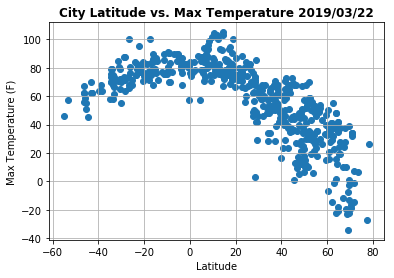

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {todays_date}", fontweight="bold")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

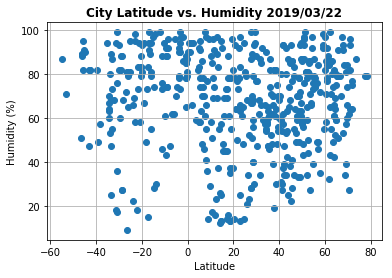

In [29]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {todays_date}", fontweight="bold")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

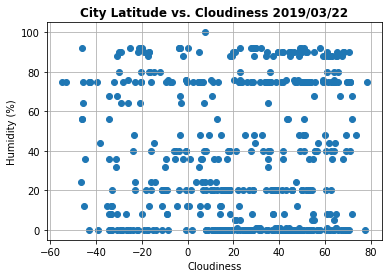

In [32]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {todays_date}", fontweight="bold")
plt.ylabel("Humidity (%)")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

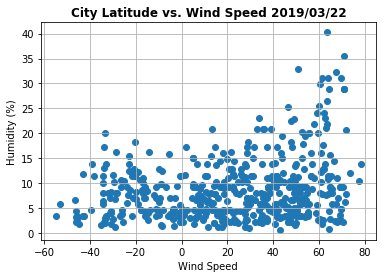

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {todays_date}", fontweight="bold")
plt.ylabel("Humidity (%)")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind Speed.png")

# Show plot
plt.show()